In [1]:
from INTI.main import call_inti

In [2]:
species = 'C2H2'             # Chemical species name        
isotope = 1                  # Isotope Chosen
call_inti(species = species , isotopologue=isotope) # Calling INTI and providing it with species name and isotope.


Validating user provided inputs...

Fetching data from HITRAN. This could take up to an hour so do not stop the download. 
Molecule: C2H2 
Isotopologue (12C)2H2 

Using ./input/C2H2  ~  (12C2-1H2)/HITRAN/


Data is fetched from http://hitran.org

BEGIN DOWNLOAD: C2H2
  65536 bytes written to ./input/C2H2  ~  (12C2-1H2)/HITRAN//C2H2.data
  65536 bytes written to ./input/C2H2  ~  (12C2-1H2)/HITRAN//C2H2.data
  65536 bytes written to ./input/C2H2  ~  (12C2-1H2)/HITRAN//C2H2.data
  65536 bytes written to ./input/C2H2  ~  (12C2-1H2)/HITRAN//C2H2.data
  65536 bytes written to ./input/C2H2  ~  (12C2-1H2)/HITRAN//C2H2.data
  65536 bytes written to ./input/C2H2  ~  (12C2-1H2)/HITRAN//C2H2.data
  65536 bytes written to ./input/C2H2  ~  (12C2-1H2)/HITRAN//C2H2.data
  65536 bytes written to ./input/C2H2  ~  (12C2-1H2)/HITRAN//C2H2.data
  65536 bytes written to ./input/C2H2  ~  (12C2-1H2)/HITRAN//C2H2.data
  65536 bytes written to ./input/C2H2  ~  (12C2-1H2)/HITRAN//C2H2.data
  65536 bytes written

In [3]:
from INTI.main import calculate_inti

P = 1                          # Pressure in bar
T = 500                        # Temperature in Kelvin
input_directory = './input/'   # Directory which I want to contain the line lists

# Calculate the C2H2  cross section
calculate_inti(species = species, isotope=1, temperature = T, pressure = P,input_dir = input_directory,broad_type='air')

INTI is shining on you! Beginning calculations for cross-sections
Found line list files, and loading HITRAN format
Reading in partition function file...
Pre-computing Voigt profiles...
Voigt profiles computed in 2.2782820420000007 s
Generating cross section for C2H2 ((12C2-1H2)) at P = 1.0 bar, T = 500.0 K
Processing file: C2H2.h5
Filtering transitions within frequency grid.
Calculating Doppler broadening parameters.
Calculating line intensities at temperature


Calculating transitions: 100%|████████| 81454/81454 [03:51<00:00, 351.72lines/s]


Time taken for C2H2.h5: 231.64 seconds
We have completed the calculation
Completed 81454 transitions in 231.64645320900001 seconds

Total time for INTI calculation: 235.046405 s


In [4]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np

In [5]:
file = 'output/C2H2  ~  (12C2-1H2)/HITRAN/C2H2_T500.0K_log_P0.0_air_sigma.txt'
xsec = Table.read(file,format='ascii')

/var/folders/1q/9g6ldzkx1yv1925k29q274mw0000gn/T/ipykernel_22368/3611844524.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(xsec['col1'],np.log10(xsec['col2']))


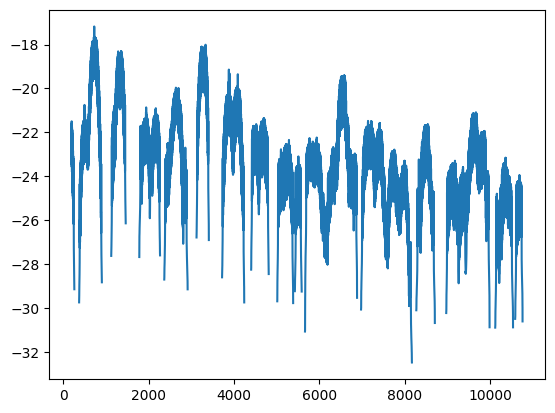

In [6]:
plt.plot(xsec['col1'],np.log10(xsec['col2']))

/var/folders/1q/9g6ldzkx1yv1925k29q274mw0000gn/T/ipykernel_22368/2097133696.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(1e4/xsec['col1'],np.log10(xsec['col2']))


Text(0.5, 0, 'wavelength (um)')

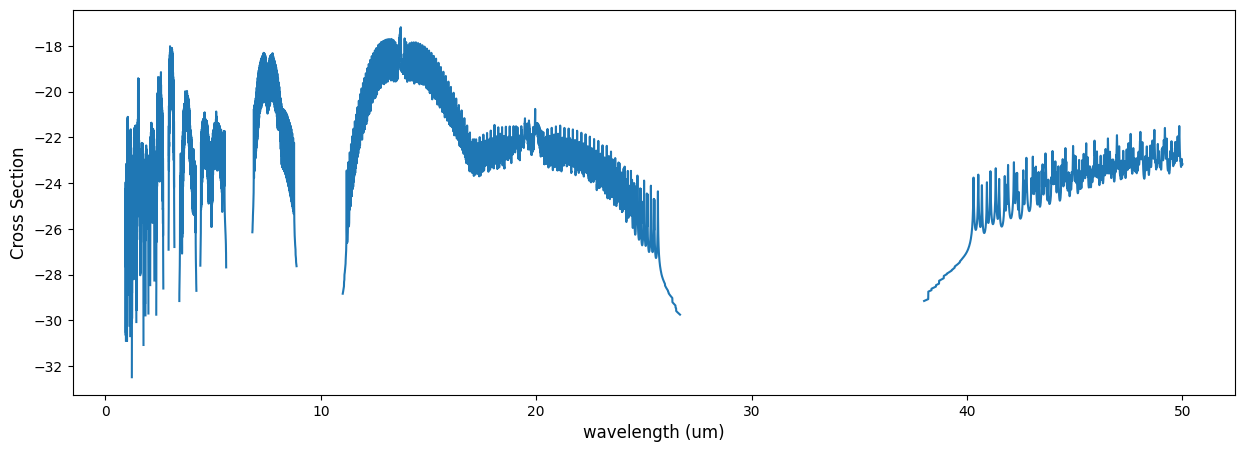

In [7]:
plt.figure(figsize=(15,5))
plt.plot(1e4/xsec['col1'],np.log10(xsec['col2']))
plt.ylabel("Cross Section",fontsize=12)
plt.xlabel("wavelength (um)",fontsize=12)